<a href="https://colab.research.google.com/github/AnujJain1011/ML-Lab/blob/main/Lab_7(ANN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 8)                 264       
                                                                 
 dense_2 (Dense)             (None, 10)                90        
                                                                 
Total params: 25,474
Trainable params: 25,474
Non-trainable params: 0
_________________________________________________________________
Mounted at /content/drive
Epoch 1/160
118/118 [==============================] - 1s 4ms/step - loss: 2.3373 - accuracy: 0.0986
Epoch 2/160
118/118 [==============================] - 0s 3ms/step - loss: 2.3096 - accuracy: 0.0987
Epoch 3/160
118/118 [==

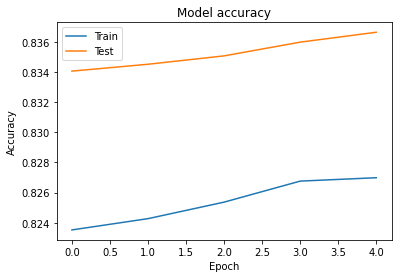

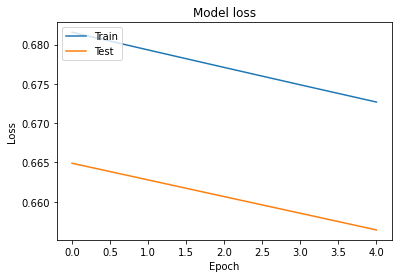

In [1]:
# ANN
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
#The images are encoded as Numpy arrays, and the labels are an array of digits, ranging from 0 to 9.
train_images.shape
len(train_labels)
train_labels
test_images.shape
len(test_labels)
test_labels
#Let's build the network

#The network architecture
'''
The core building block of neural networks is the layer, a data-processing module that you can think of as a filter for data.
Some data goes in, and it comes out in a more useful form.
Layers extract representations (hopefully, meaningful for the data problem at hand) out of the data fed into them.
Most of deep learning consists of chaining together simple layers that will implement a form of progressive data distillation.
A deep learning model is like a sieve for data-processing, made of a succession of increasingly refined data filters--the layers.
'''

from keras import models
from keras import layers
network = models.Sequential()
# Dense(32) is a fully-connected layer with 32 hidden units.
# in the first layer, you must specify the expected input data shape :
# here, 28 X 28=784 -dimensional vectors.
network.add(layers.Dense(32, activation='sigmoid', input_shape=(28 * 28, )))
network.add(layers.Dense(8, activation='sigmoid'))
network.add(layers.Dense(10, activation='softmax'))
network.summary()
from google.colab import drive
drive.mount('/content/drive')
'''Our network consists of a sequence of two Dense layers, which are densely connected (also called fully connected) neural layers.
The second (and last) layer is a 10-way softmax layer, which means it will return an array of 10 probability scores. Each score will be the probability that the current digit image belongs to one of our 10 digit classes.
The compilation step

To make the network ready for training, we need to pick three more things, as part of the compilation step:
A loss function-- How the network will be able to measure its performance on the training data, and thus how it will be able to steer itself in the right direction.
An optimizer--The mechanism through which the network will update itself based on the data it sees and its loss function.
Metrics to monitor during training and testing--Here, we will only care about accuracy (the fraction of the images that were correctly classified).
'''
network.compile(optimizer='sgd',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
#Preparing the image data
#Before training, we will preprocess the data by reshaping it into the shape the network expects and scaling it so that all values are in the 
#[0−1]  interval

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255.
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255.
#Preparing the labels

#We also need to categorically encode the labels.

from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
train_labels
test_labels = to_categorical(test_labels)
test_labels

#Training and Testing
#We are now ready to train the network, which in Keras is done via a call to the network's fit method--we fit the model to its training data:

network.fit(train_images, train_labels, epochs=160, batch_size=512)

'''Two quantities are displayed during training:
The loss of the network over the training data
The accuracy of the network over the training data
We quickly reach an accuracy of 0.9886(98.86%)
 on the training data.
'''

'''Now let's check that the model performs well on the test set, too:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('Test Accuracy: {:.5f} '.format(test_acc))
test_acc
The test-set accuracy turns out to be 
97.780% --that is quite a bit lower than the training set accuracy. This gap between training and test accuracy is an example of overfitting:the fact that the ML models tend to perform worse on new data than on their training data
'''

from keras.utils import plot_model
plot_model(network, to_file='model.png')
import matplotlib.pyplot as plt
history =network.fit(train_images, train_labels, validation_split=0.33,epochs=5, batch_size=512)
history_dict = history.history
print(history_dict.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()